In [1]:
import numpy as np

In [2]:
#2乗和誤差
def mean_squared_error(y,t):
    return 0.5 * np.sum((y - t)**2)

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
len(y)

10

In [7]:
mean_squared_error(np.array(y),np.array(t))

np.float64(0.09750000000000003)

In [8]:
#交差エントロピー損失
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))


In [9]:
cross_entropy_error(np.array(y),np.array(t))

np.float64(0.510825457099338)

In [10]:
#ミニバッジ学習
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [15]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    return  -np.sum(t * np.log(y + 1e-7)) / batch_size

In [16]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size

In [31]:
#数値微分
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [19]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

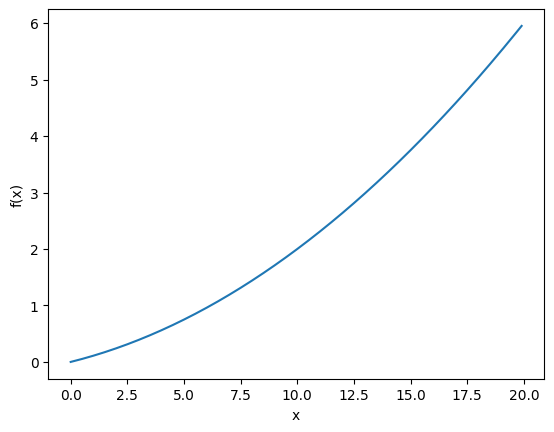

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()


In [32]:
numerical_diff(function_1,5)

0.1999999999990898

In [33]:
numerical_diff(function_1,10)

0.2999999999986347

In [34]:
#偏微分
def function_2(x):
    return x[0]**2 + x[1]**2

In [35]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [36]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2,4.0)

7.999999999999119

In [ ]:
#偏微分
def function_2(x):
    return x[0]**2 + x[1]**2

In [37]:
#勾配
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [ ]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [41]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [42]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

### 勾配の示す方向は、各場所において関数の値を最も減らす方向である！！

In [43]:
#勾配降下法
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x

In [44]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)


array([-6.11110793e-10,  8.14814391e-10])

In [45]:
#学習率が大きすぎるケース
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)


array([-2.58983747e+13, -1.29524862e+12])

In [46]:
#学習率が小さすぎるケース
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)


array([-2.99999994,  3.99999992])

In [47]:
#ニューラルネットワークを例として、実際に勾配を求める実装

import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [48]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)

        return loss

In [51]:
net = simpleNet()
print(net.W)

[[ 1.70579785  0.51055084  0.10930416]
 [ 0.5449981  -1.77380581 -0.14031327]]


In [52]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[ 1.51397701 -1.29009472 -0.06069945]


In [53]:
np.argmax(p)

np.int64(0)

In [54]:
t = np.array([1,0,0])#正解ラベル
net.loss(x,t)

np.float64(0.23715480758509602)

In [55]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f,net.W)
print(dW)

[[-0.12667855  0.02866575  0.09801281]
 [-0.19001783  0.04299862  0.14701921]]


# 学習アルゴリズムの実装

In [56]:
import sys,os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self,input_size,hidden_size,
                 output_size,weight_init_std=0.01):
        
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size,output_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(input_size,output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self,x):
        W1,W2 = self.params["W1"],self.params["W2"]
        b1,b2 = self.params["b1"],self.params["b2"]

        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)

        return y

    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)

    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self,x,t):
        loss_W = lambda W : self.loss(x,t)
        grads = {}

        grads["W1"] = numerical_gradient(loss_W,self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W,self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W,self.params["W2"]) 
        grads["b2"] = numerical_gradient(loss_W,self.params["b2"])

        return grads      



In [ ]:
# ミニバッジ学習の実装

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch,t_batch)

    for key in ("W1","b1","W2","b2"):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch,t_batch)
        train_loss_list.append(loss)


In [67]:
x = np.array([[2,3],[1,2],[3,7]])
x_batch = np.random.choice(2,3)
print(x_batch)
x[x_batch]

[1 0 0]


array([[1, 2],
       [2, 3],
       [2, 3]])

In [70]:
y = np.array([2,1,3,4,5,6,7,8,9])
y[[2,3]]

array([3, 4])

In [ ]:
# ミニバッジ学習の実装(修正)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size,1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch,t_batch)

    for key in ("W1","b1","W2","b2"):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch,t_batch)
        train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.apppend(test_acc)
        print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))

# 2周目

In [ ]:
#2乗和誤差
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
#交差エントロピー誤差
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [3]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


In [ ]:
#バッチ対応版交差エントロピー誤差の実装
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
#数値微分(中心差分を用いて)
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h) 

In [13]:
#数値微分の簡単な実装
def function_1(x):
    return 0.01*x**2 + 0.1*x

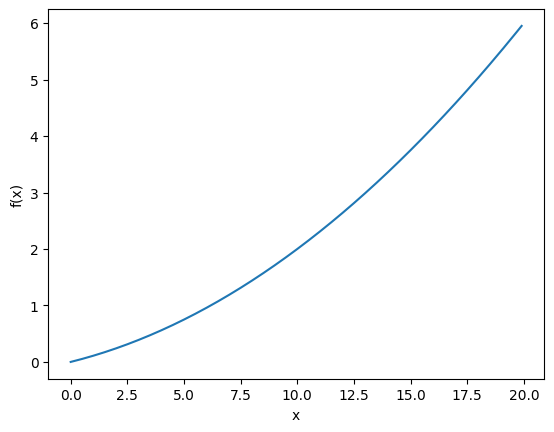

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [16]:
numerical_diff(function_1,5)

0.1999999999990898

In [17]:
def function_2(x):
    return x[0]**2 + x[1]**2


In [18]:
#偏微分の実装
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1,3.0)


6.00000000000378

In [19]:
def function_tmp2(x1):
    return 3.0**2 + x1*x1
numerical_diff(function_tmp2,4)

7.999999999999119

### すべての変数の偏微分をベクトルでまとめたものを勾配という

In [23]:
#勾配を求める式の実装
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad
    

In [24]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

In [ ]:
#勾配法の実装
def gradient_descent(f,init_x,lr=0.01,step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad

    return x


In [27]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

In [30]:
#SimpleNetの実装
import sys,os
sys.path.append(os.pardir)
import numpy as np
from functions import softmax,cross_entropy_error
from gradient import numerical_gradient

In [32]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)

        return loss

In [33]:
net = simpleNet()
print(net.W)

[[-8.70726164e-01  1.57530252e-01 -5.46314560e-01]
 [-1.13048713e+00  7.73982298e-01 -8.16281981e-04]]


In [35]:
x = np.array([0.6,0.9])
p = net.predict(x)
p

array([-1.53987412,  0.79110222, -0.32852339])

In [36]:
np.argmax(p)

np.int64(1)

In [37]:
t = np.array([0,1,0])
net.loss(x,t)

np.float64(0.35319068076717713)

In [39]:
#勾配
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.04096682 -0.17853409  0.13756728]
 [ 0.06145022 -0.26780114  0.20635091]]


In [40]:
#TwoLayerNetの実装
import sys,os 
sys.path.append(os.pardir)
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params={}
        self.params["W1"] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self,x):
        W1,W2 = self.params["W1"],self.params["W2"]
        b1,b2 = self.params["b1"],self.params["b2"]

        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)

        return y        
    
    def loss(self,x,t):
        y = self.predict(x)

        return cross_entropy_error(y,t)
    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        accuracy = np.sum(y == t) /float(x.shape[0])
        return accuracy

    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W,self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W,self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W,self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W,self.params["b2"])
        
        return grads

In [43]:
#ミニバッジ学習の実装
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 100  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

ModuleNotFoundError: No module named 'common'